<a href="https://colab.research.google.com/github/JamesChoi722/JamesChoi722/blob/main/Capstone_3_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mall Customer Segmentation Data**


**Content**

You are owing a supermarket mall and through memberhsip cards, you have some basic data about your customers like Customer ID, age, gender, annual income and spending score.

Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data.

**Problme Statement**

You own the mall and want to understand the customers like who can be easily converge [Target Customers] so that the sense can be given to marketing team and plan  the strategy accordingly.


**Reference**

https://www.kaggle.com/fazilbtopal/popular-unsupervised-clustering-algorithms/data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
from sklearn.preprocessing import StandardScaler

import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
# Import dataset
df = pd.read_csv('Mall_Customers.csv')
df.head(2)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [ ]:
# Summary of Dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
# Rearrange the datafram to divided by 4 sections
df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


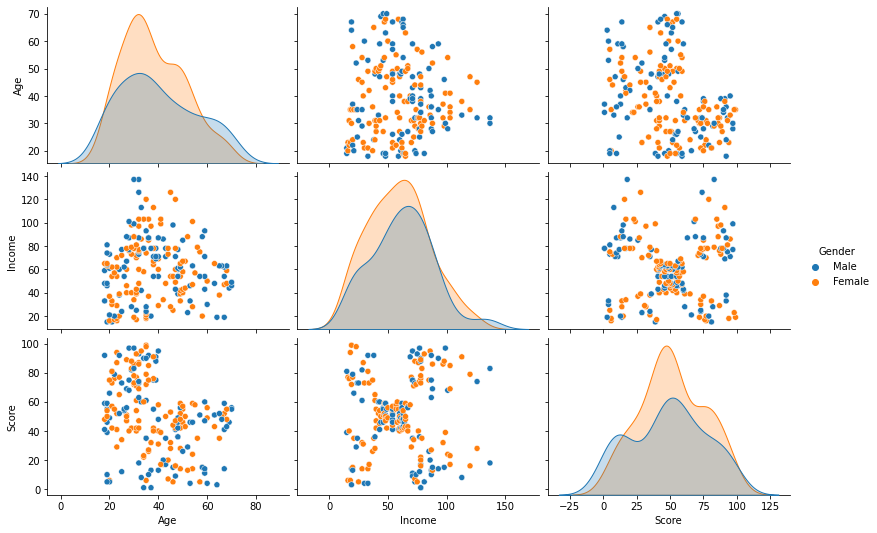

In [ ]:
# Let's see our data in a detailed way with pairplot
X = df.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

From above plots show age, income, and score between two genders. We can look it up more details next graph.

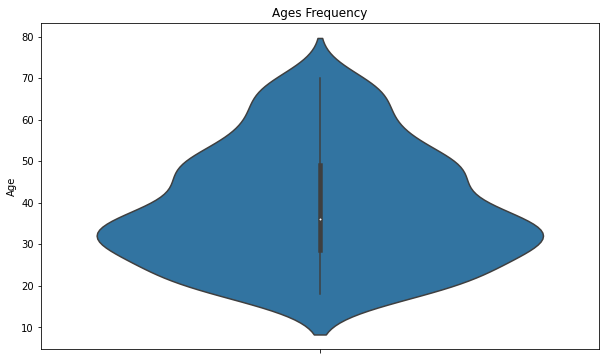

In [ ]:
# Plot Age Frequency
df.drop(["CustomerID"], axis = 1, inplace=True)

plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Age"])
plt.show()

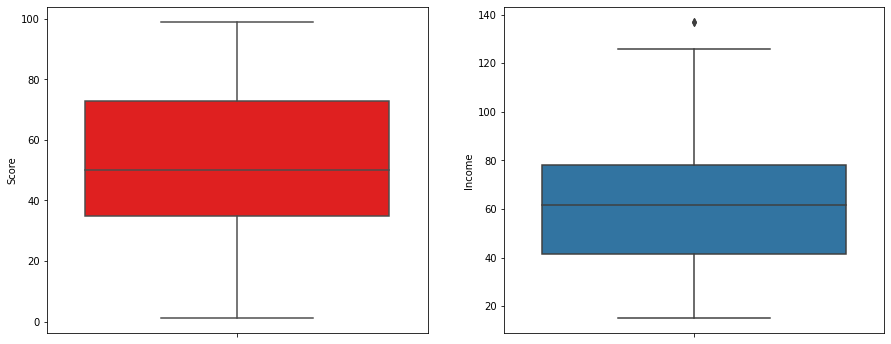

In [ ]:
# Plot spending score (1-100)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Score"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Income"])
plt.show()

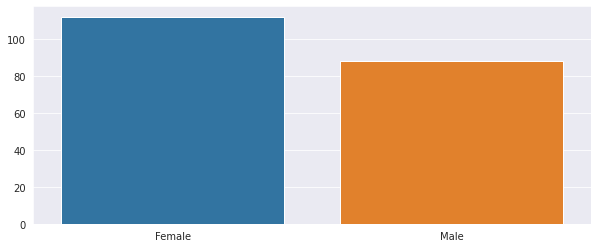

In [ ]:
# Plot gender 
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

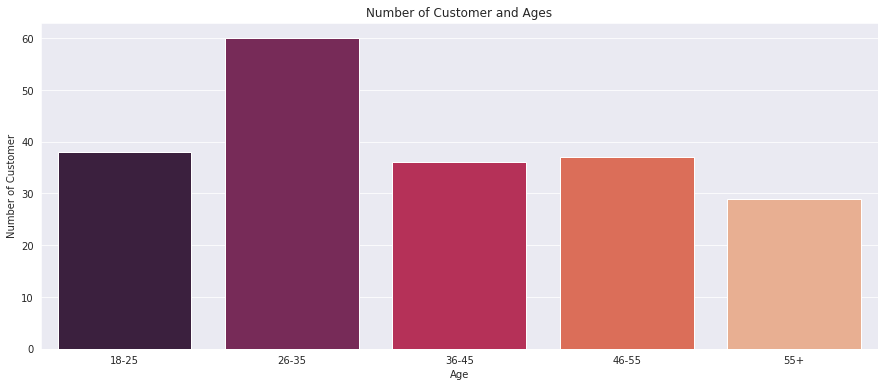

In [ ]:
# Plot the number of customer and age histogram
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

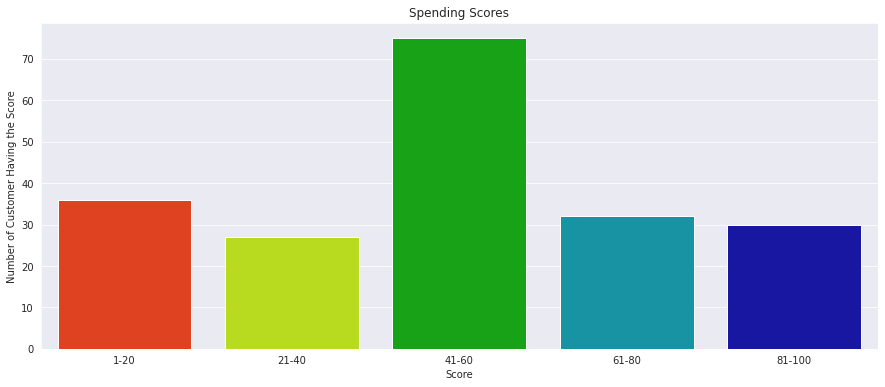

In [ ]:
# Plot the number of customer vs. spending score
ss1_20 = df["Score"][(df["Score"] >= 1) & (df["Score"] <= 20)]
ss21_40 = df["Score"][(df["Score"] >= 21) & (df["Score"] <= 40)]
ss41_60 = df["Score"][(df["Score"] >= 41) & (df["Score"] <= 60)]
ss61_80 = df["Score"][(df["Score"] >= 61) & (df["Score"] <= 80)]
ss81_100 = df["Score"][(df["Score"] >= 81) & (df["Score"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

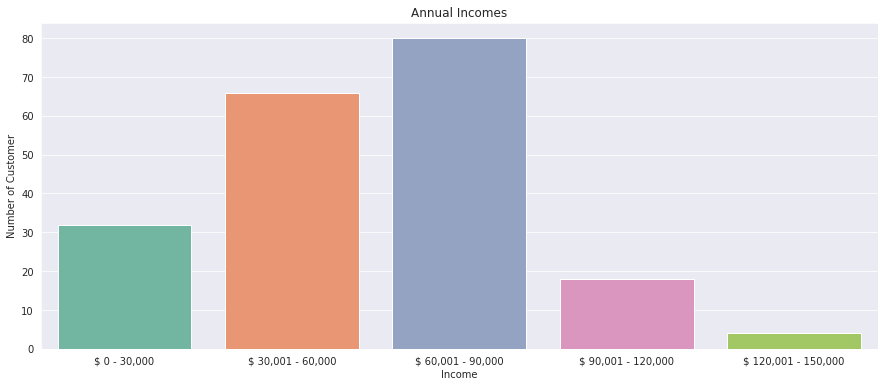

In [ ]:
# Plot the number of customers vs. annual incomes
ai0_30 = df["Income"][(df["Income"] >= 0) & (df["Income"] <= 30)]
ai31_60 = df["Income"][(df["Income"] >= 31) & (df["Income"] <= 60)]
ai61_90 = df["Income"][(df["Income"] >= 61) & (df["Income"] <= 90)]
ai91_120 = df["Income"][(df["Income"] >= 91) & (df["Income"] <= 120)]
ai121_150 = df["Income"][(df["Income"] >= 121) & (df["Income"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

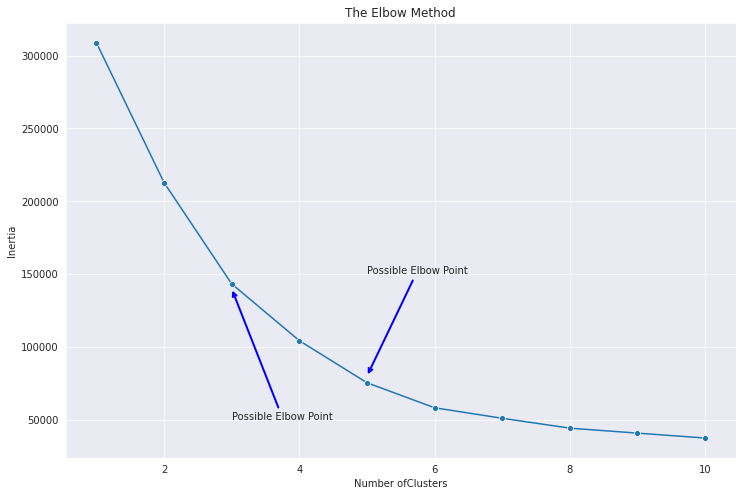

In [ ]:
# K-mean and Elbow method
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init= 'k-means++', random_state = 40 )
    km.fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), marker = 'o', y=clusters, ax=ax)
ax.set_title('The Elbow Method')
ax.set_xlabel('Number ofClusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see from the graph. As we can see from the graph, we can say this may be either 3 or 5. Let's see both results in graph and decide.

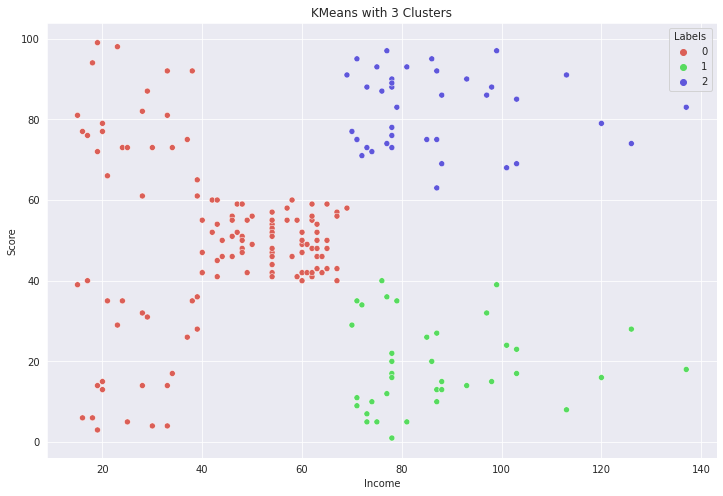

In [ ]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

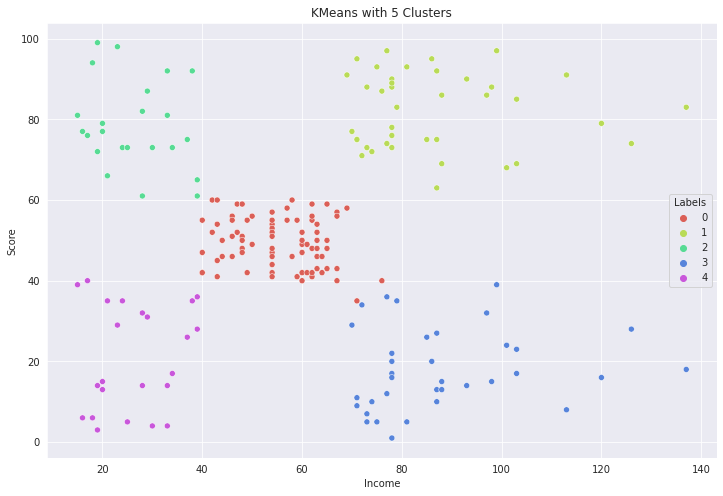

In [ ]:
# 5 Clusters
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

From above the graph, we can see that 5 cluster seems better than the 3 cluster cluster. As this is an unsupervised problem, we can't really know for sure which one is the best in real life but by looking at the dat it's better to say that 5 would be our choice.

We can analyze our 5 clusters in detials:

*   Label 0 : Low income and High spending
*   Label 1 : High income and Low spending
*   Label 2 : High income and High spending
*   Label 3 : Mid income and Mid spending
*   Label 4 : Low income and Low spending

We can check tehm more clearly by swarmplot.

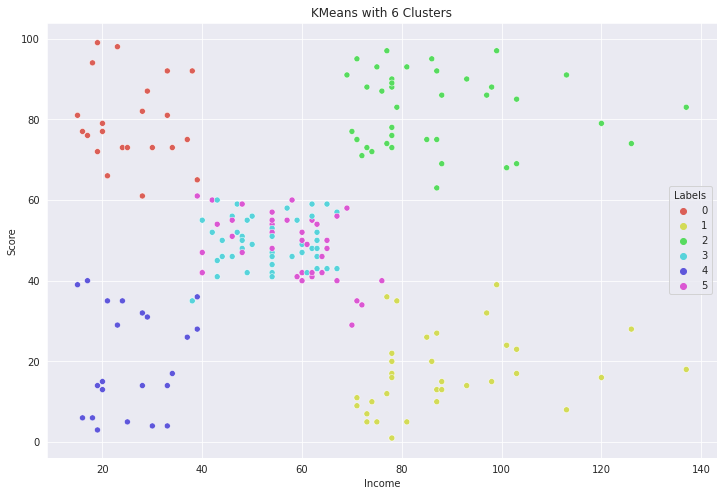

In [ ]:
# 6 Clusters
km6 = KMeans(n_clusters=6).fit(X)

X['Labels'] = km6.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 6))
plt.title('KMeans with 6 Clusters')
plt.show()

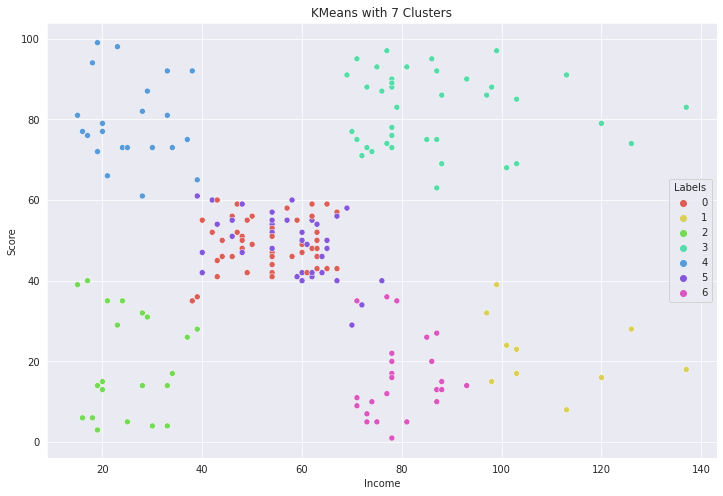

In [ ]:
# 7 Clusters
km7 = KMeans(n_clusters=7).fit(X)

X['Labels'] = km7.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 7))
plt.title('KMeans with 7 Clusters')
plt.show()

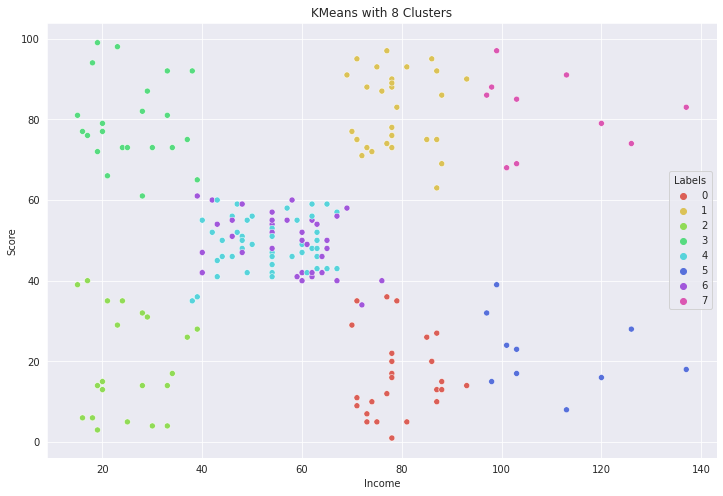

In [ ]:
# 8 Clusters
km8 = KMeans(n_clusters=8).fit(X)

X['Labels'] = km8.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 8))
plt.title('KMeans with 8 Clusters')
plt.show()

In [ ]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 5, init = 'k-means++', random_state = 40)
y_km = km.fit_predict(X)

In [ ]:
#Calculate the average of silhouette scores
silhouette_avg = silhouette_score(X,y_km)

#Calculate the silhouette score for each data
each_silhouette_score = silhouette_samples(X,y_km,metric="euclidean")

In [ ]:
print(silhouette_avg)

0.44420417247273564


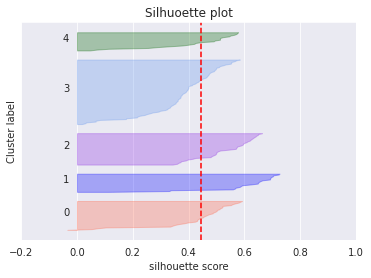

In [ ]:
fig =plt.figure()
ax = fig.add_subplot(1,1,1)
y_lower =10
n_clusters=5
colorlist =["tomato","blue","blueviolet","cornflowerblue","darkgreen","seashell","skyblue","mediumseagreen"]

for i in range(n_clusters):
    ith_cluster_silhouette_values = each_silhouette_score[y_kmeans == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colorlist[i]
    ax.fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.3)
    
    #label the silhouse plots with their cluster numbers at the middle
    ax.text(-0.05,y_lower + 0.5 * size_cluster_i,str(i))
    
    #compute the new y_lower for next plot
    y_lower = y_upper +10 
    
ax.set_title("Silhuoette plot")
ax.set_xlabel("silhouette score")
ax.set_ylabel("Cluster label")
    
#the vertical line for average silhouette score of all the values
ax.axvline(x=silhouette_avg,color="red",linestyle="--")
    
ax.set_yticks([])
ax.set_xticks([-0.2,0,0.2,0.4,0.6,0.8,1])

For n_clusters = 2 The average silhouette_score is : 0.2922203985120814
For n_clusters = 3 The average silhouette_score is : 0.3838263968440884
For n_clusters = 4 The average silhouette_score is : 0.4049016571886949
For n_clusters = 5 The average silhouette_score is : 0.44420417247273564
For n_clusters = 6 The average silhouette_score is : 0.45282478217020383
For n_clusters = 7 The average silhouette_score is : 0.4443497246564955
For n_clusters = 8 The average silhouette_score is : 0.4328039845968413
For n_clusters = 9 The average silhouette_score is : 0.4199775902523653
For n_clusters = 10 The average silhouette_score is : 0.3889052237090081


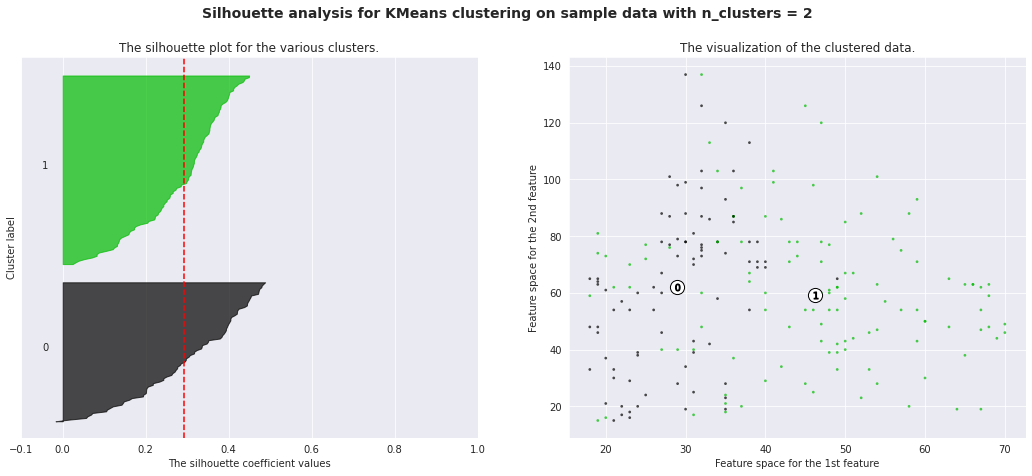

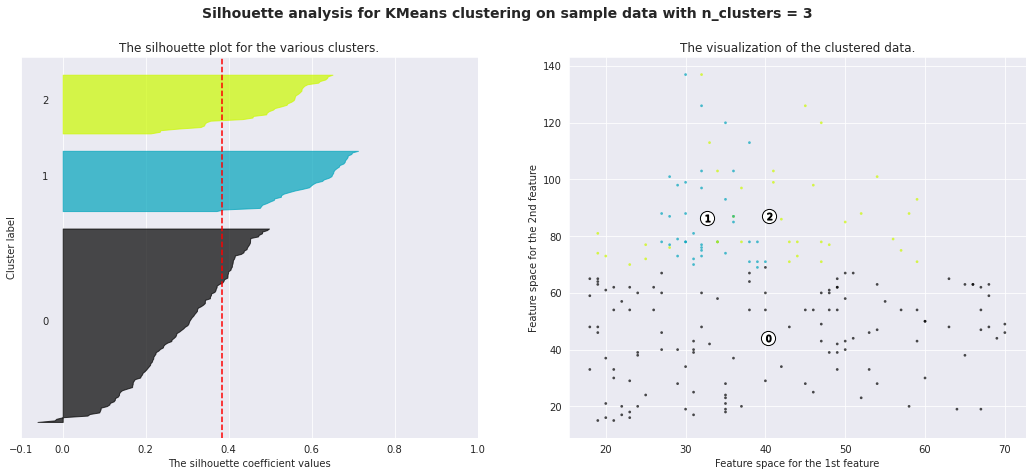

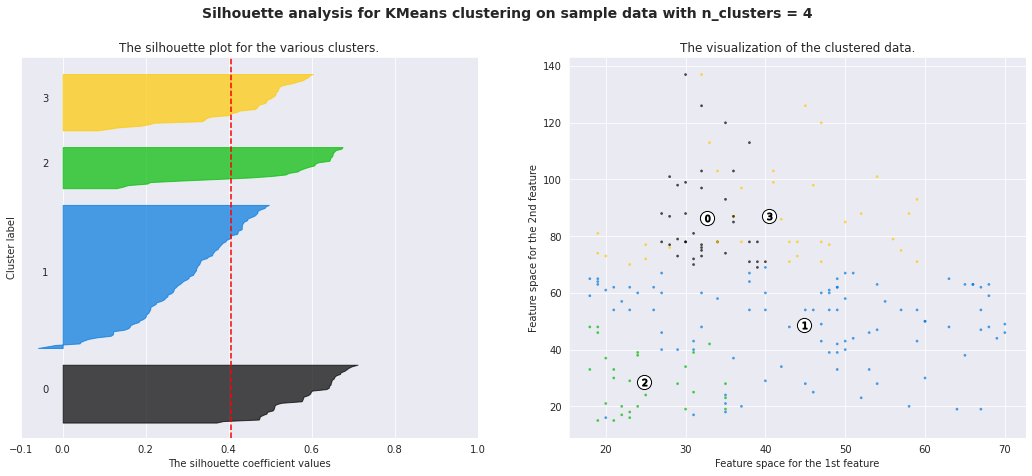

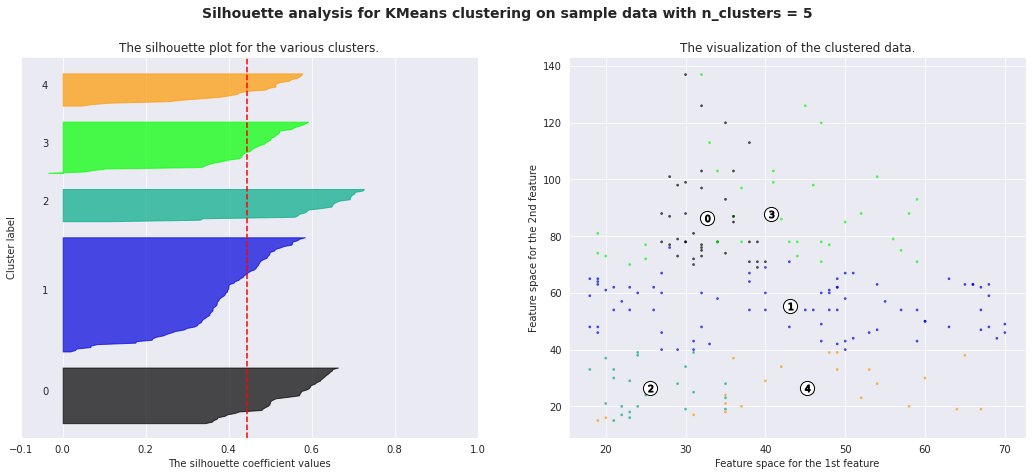

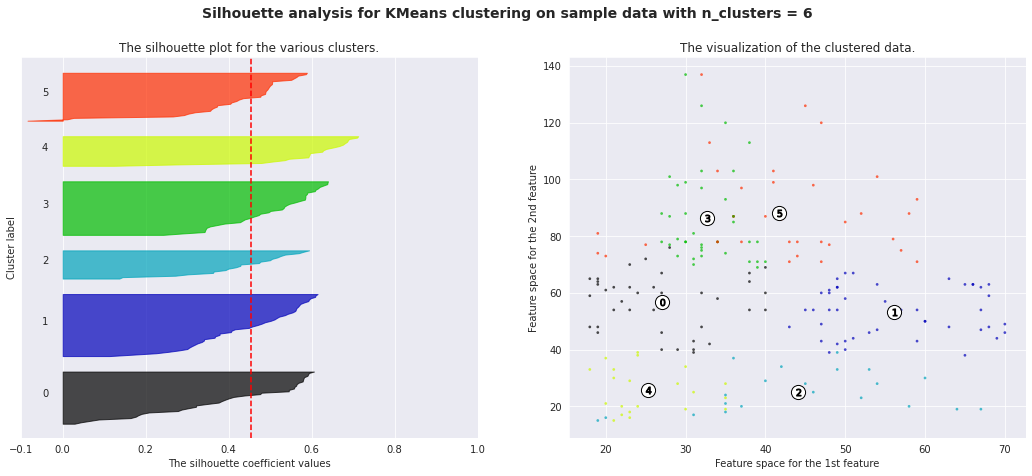

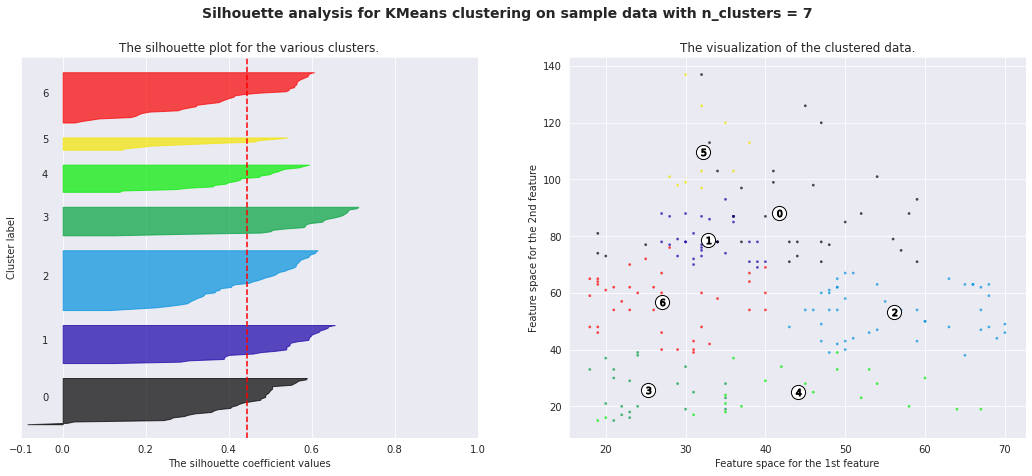

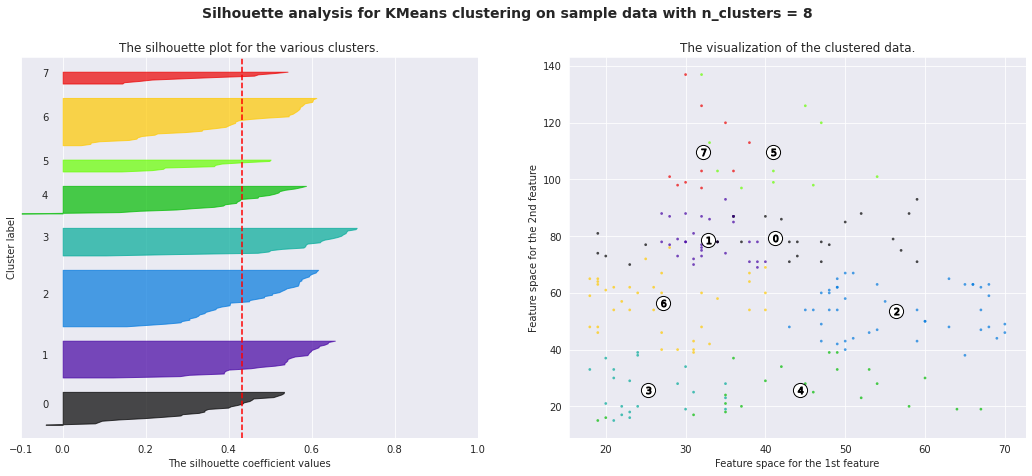

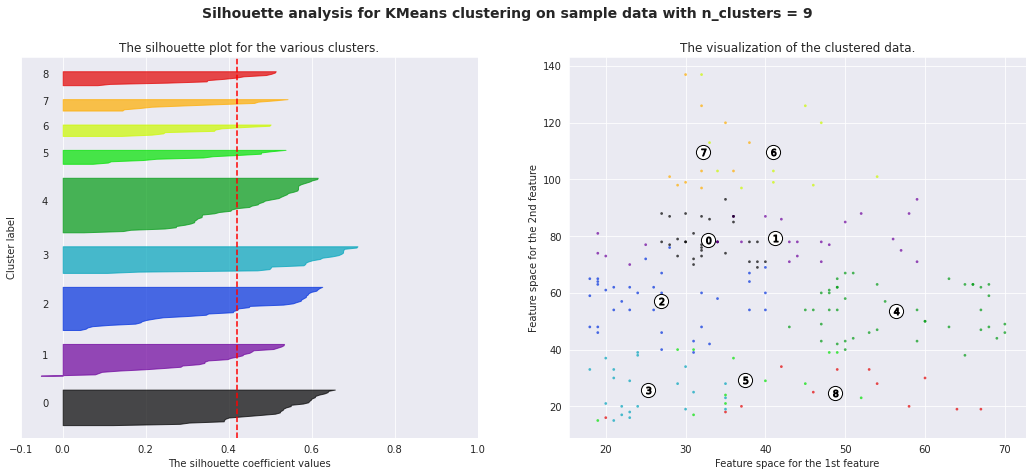

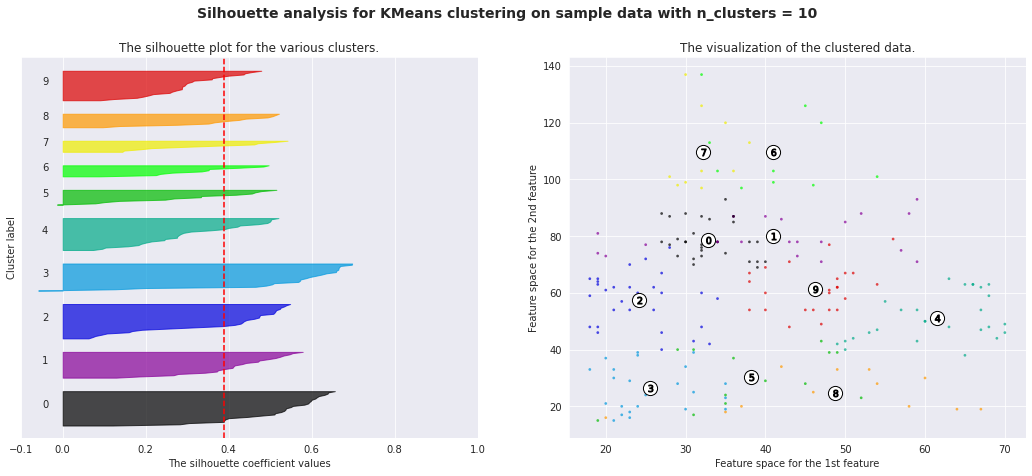

In [ ]:
# Silhouette score

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

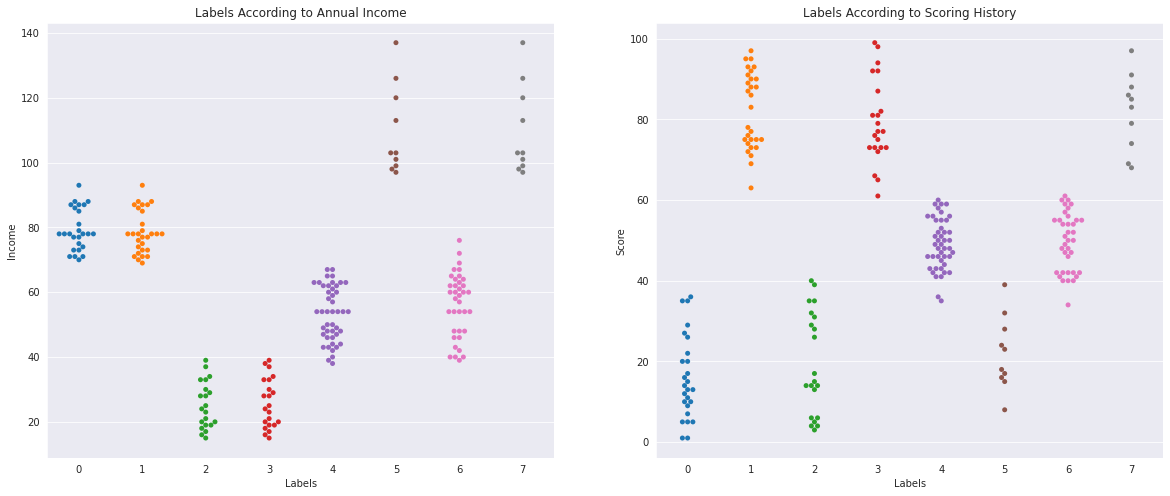

In [ ]:
# Swarm Plot
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()

We can clearly see our 5 cluster as we indicated before.

Hierarchical Clustering

Agglomerative

We will use the clustering technique, which is Agglomerative and Hierarchical Clustering. Agglomerative is the bottom up approach which more popular than divisive clustering.

We will use complete linkage as the linkage Criteria.

The agglomerative clustering class will require two inputs:

  n_cluster: The number of clusters to form as well as the number of centroids to generate.

  Linkage: The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster than minimize this criterion.

Another recommendation that try everything with "average" as well.

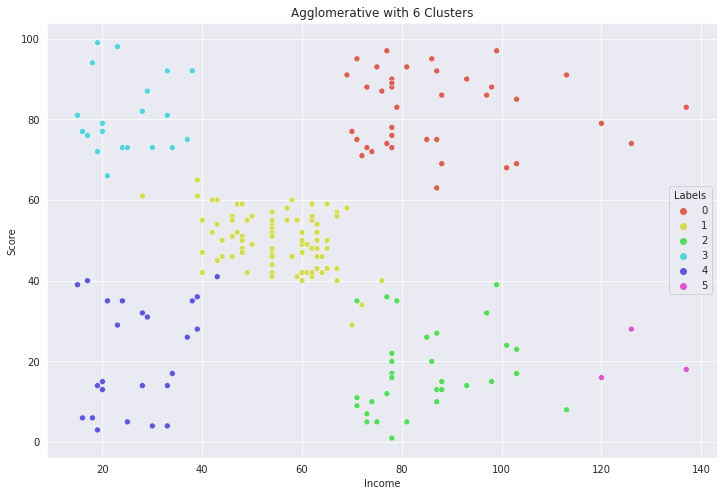

In [ ]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=6, linkage='average').fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 6))
plt.title('Agglomerative with 6 Clusters')
plt.show()

In [ ]:
#Computing "the Silhouette Score"
print("The silhouette score of the agglomerative solution: {}"
      .format(metrics.silhouette_score(X, agglom.labels_, metric='euclidean')))

The silhouette score of the agglomerative solution: 0.4196472258685429


We can see clearly 5 cluster by Agglomerative clustering method. 


Dendrogram Associated for the Agglomerative Hierarchical Clustering

Distance matrix contains the distance from each point to every other point of a dataset.

We can use the function distance_matrix which requires two inputs.

The distance values are symmetric, with a diagonal of 0's. This is one way of amking sure your matrix is correct.


In [ ]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

dist = distance_matrix(X, X)
print(dist)

[[  0.          42.05948169  33.03028913 ... 117.17934972 124.47891388
  130.21904623]
 [ 42.05948169   0.          75.01999733 ... 111.80339887 137.76066202
  122.38463956]
 [ 33.03028913  75.01999733   0.         ... 129.93844697 122.18837915
  143.82628411]
 ...
 [117.17934972 111.80339887 129.93844697 ...   0.          57.28874235
   14.35270009]
 [124.47891388 137.76066202 122.18837915 ...  57.28874235   0.
   65.22269544]
 [130.21904623 122.38463956 143.82628411 ...  14.35270009  65.22269544
    0.        ]]


Use the linkage classs from hierarchy, pass in the parameters:

The distance matrix

Complete for complete linkage.

In [ ]:
Z = hierarchy.linkage(dist, 'complete')

A hierarchical clustering is typically visualized as a dendrogram as shown in the next procedure. Each merge is represented by a horizontal line. The y-coordinate of teh horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. By moving up from the bottom to the nop, a dendrogram allows us to reconstruct teh history of merges that resulted in the depicted clustering.

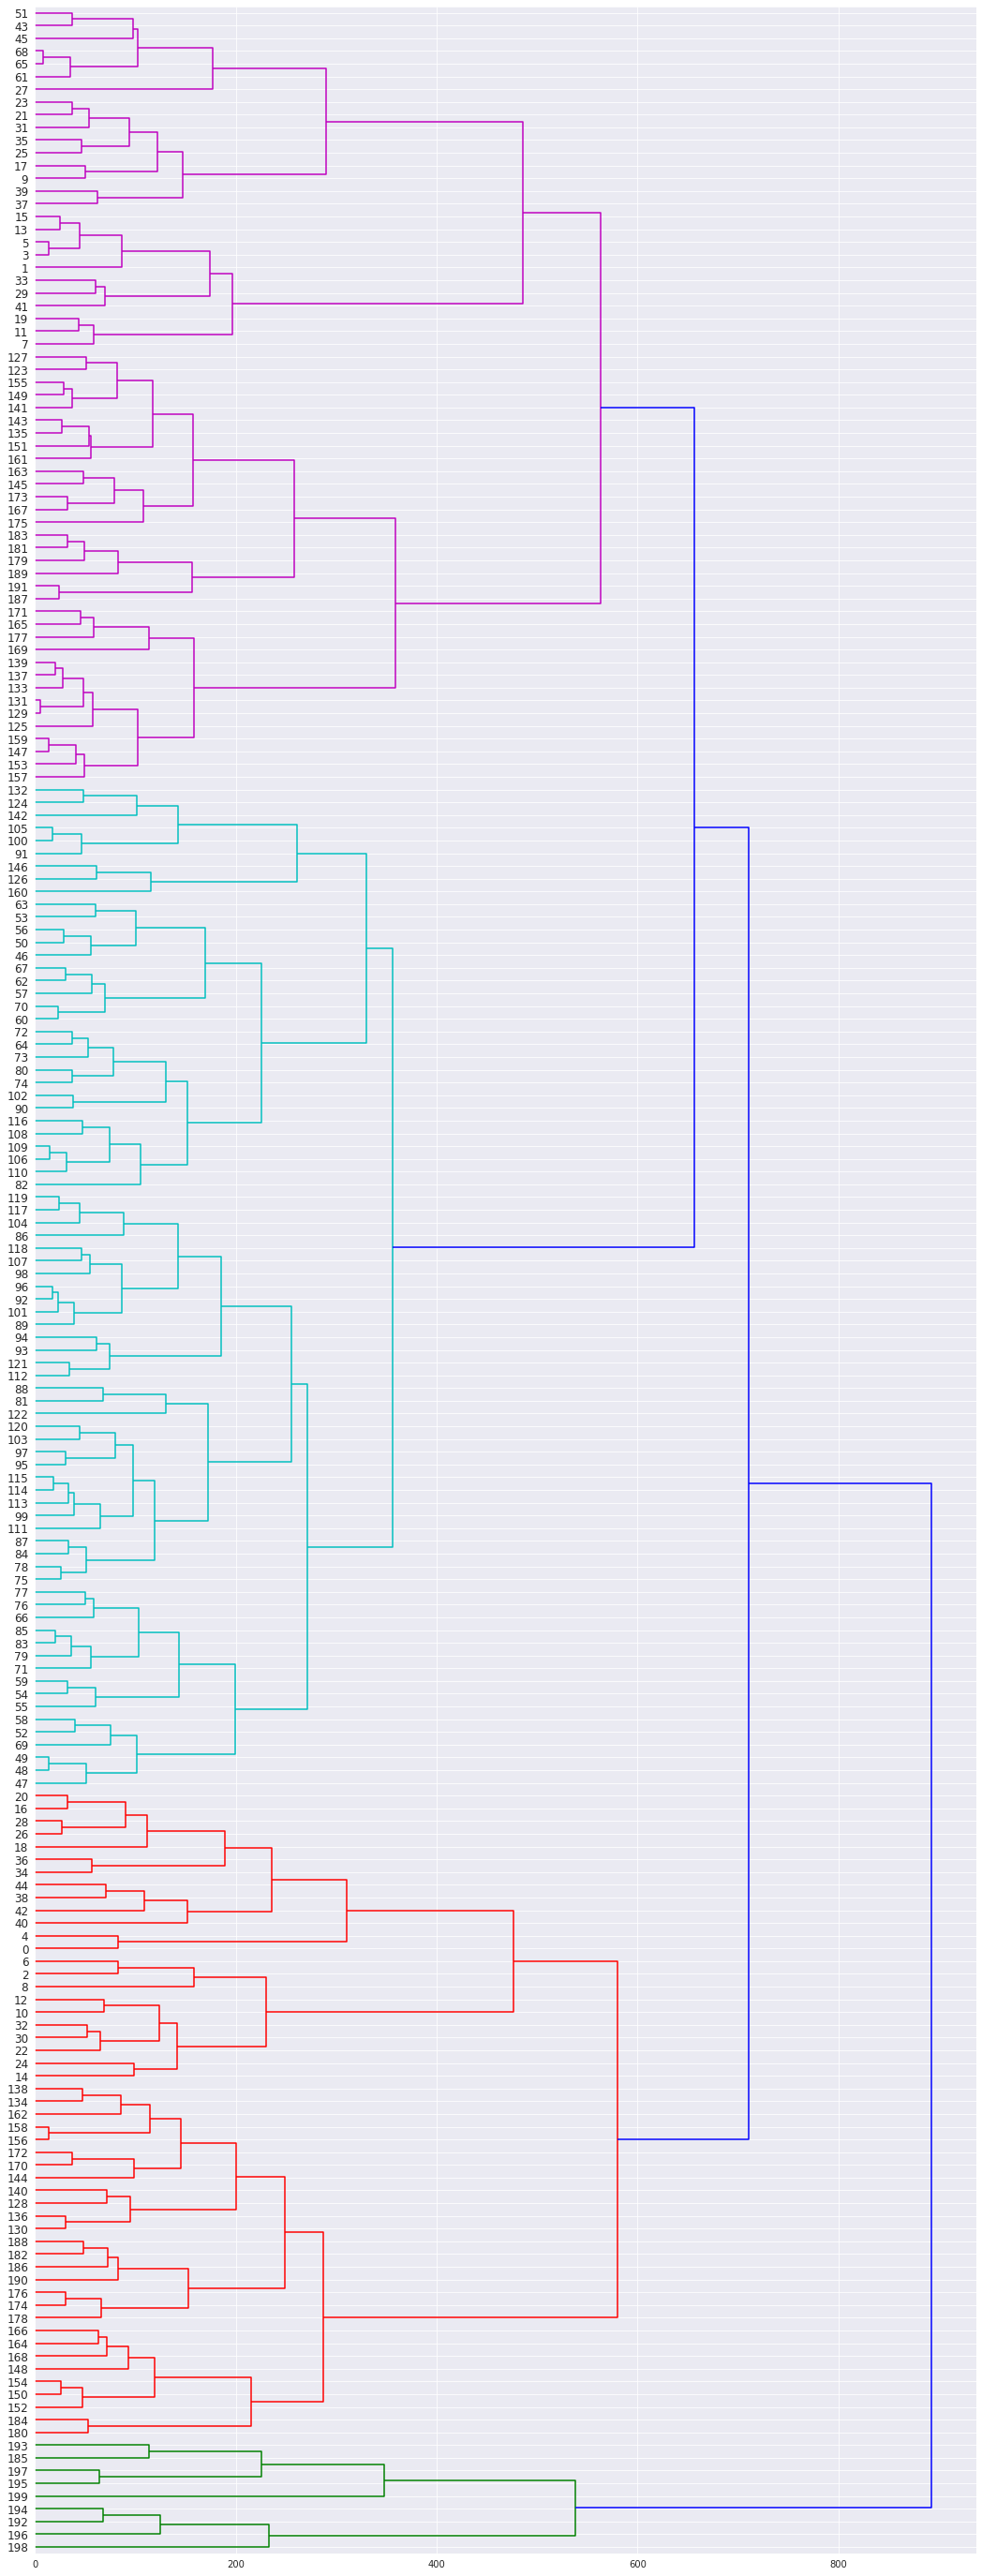

In [ ]:
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

We used complete linkage for this case, let's change it to average linkage to see how the dendrogram changes.

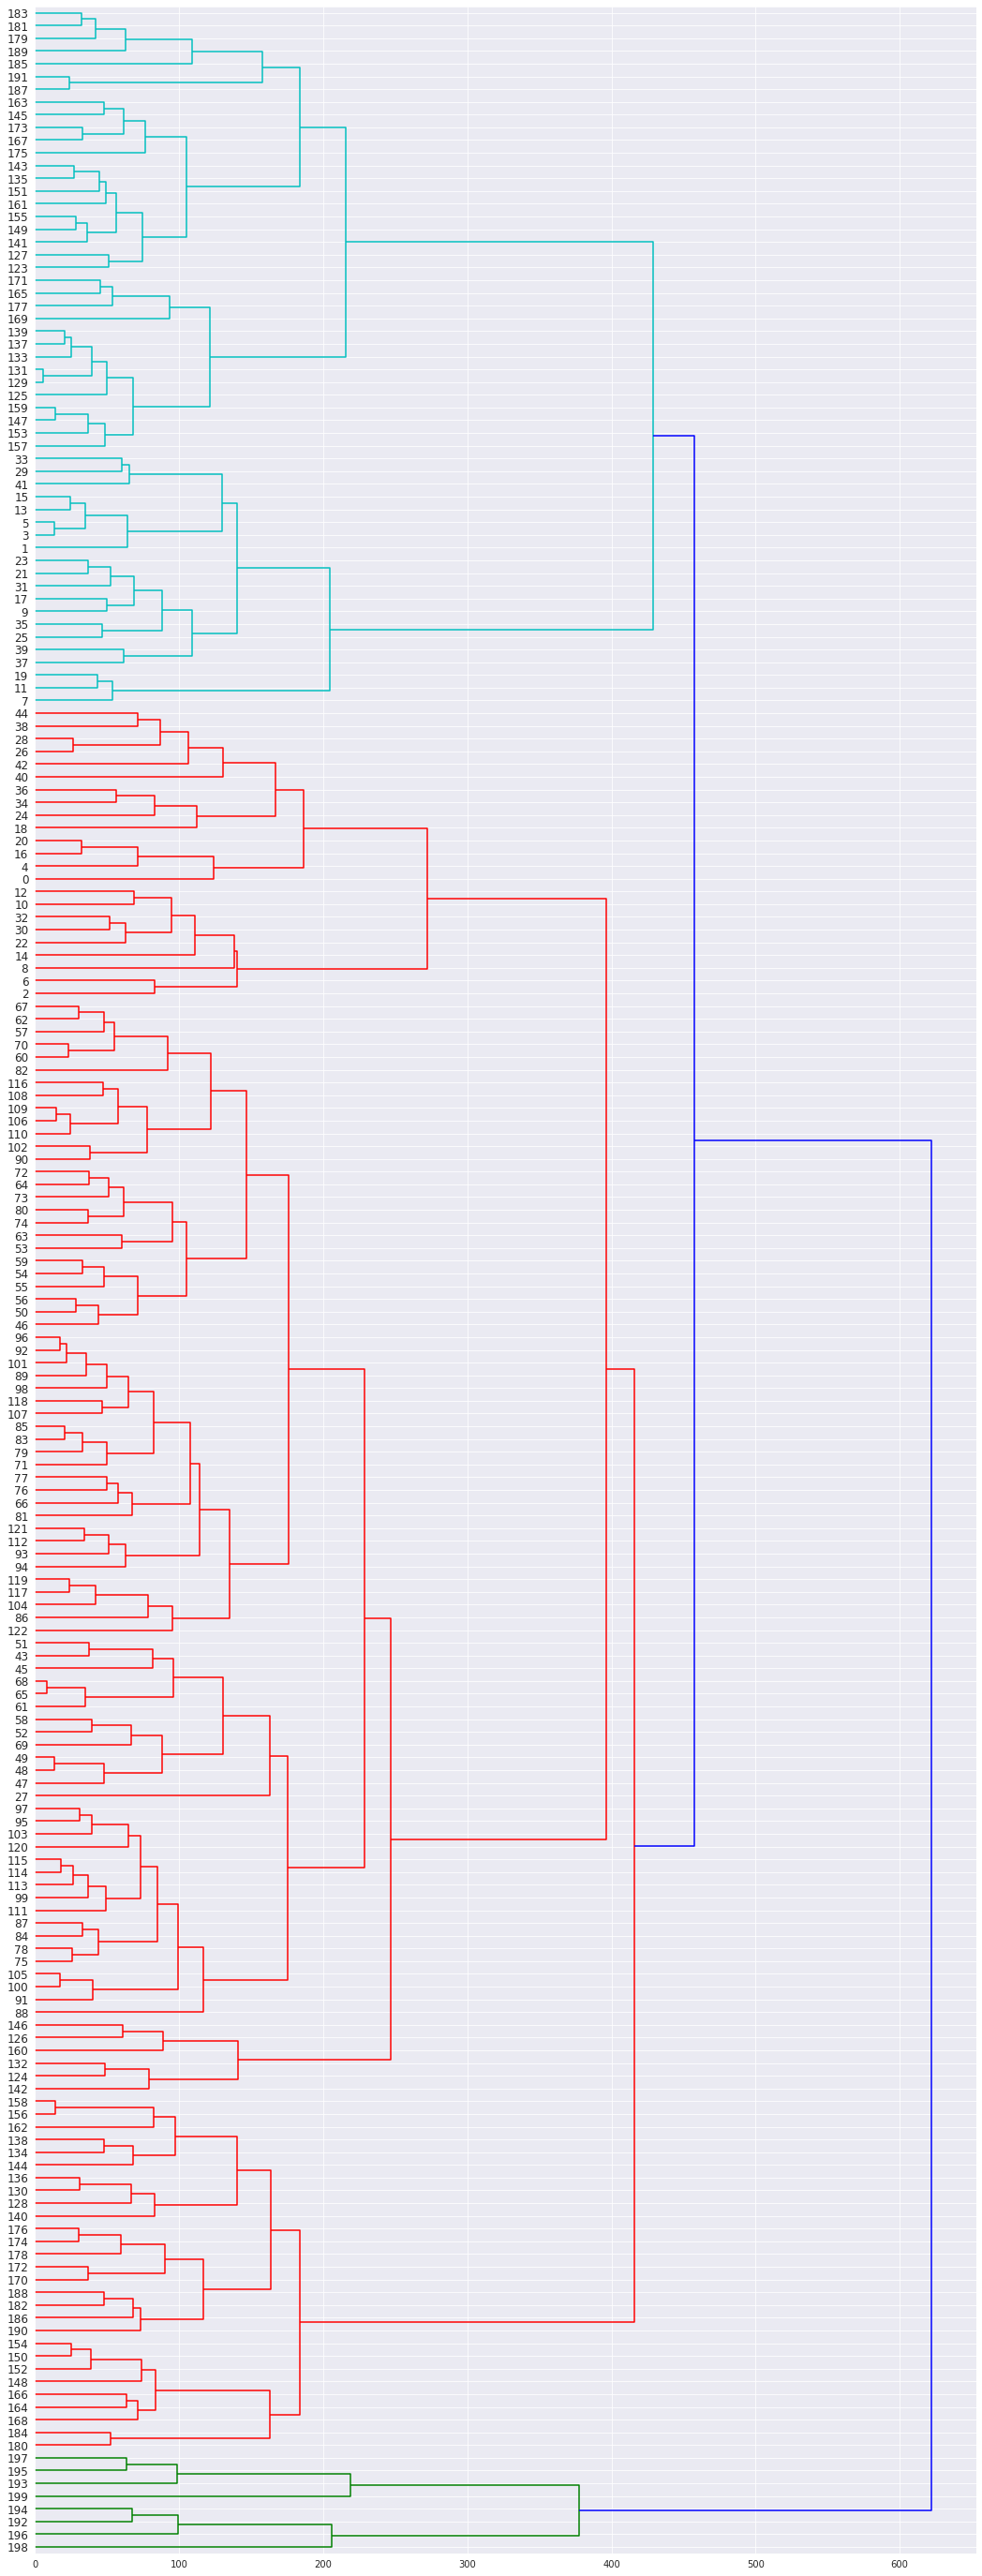

In [ ]:
Z = hierarchy.linkage(dist, 'average')
plt.figure(figsize=(18, 50))
dendro = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Density Based Clustering (DBSCAN)

Most of the traditional clustering techniques such as K-means and hierarchical clustering can be used to group data without supervision.

However, when we applied to tasks with arbitrary shape clusters, or clusters within cluster, traditional clustering techniques might be unable to ahieve good results. That is, elemetns in the same cluster might not share enough similarity or the performance may be poor. 

DBSCAN locates regions of high density that are separated from one another by regions of low density. Density is defined as the number of points within a specified radius.

DBSCAN stands for Density Based Spatial Clustering of Applications with Noise.

This technique is one of the most common clustering algorithms which works based on density of object. The idea is that if a particular point belongs to a cluser, it should be near to lots of other points int hat cluster.

It works based on two parameters:

  Epsilon: It determines a specified radius that if includes enough number of points within dense area.

  Minimum Samples: It determine the minimum number of data points we want in a neighborhood to define a cluster.



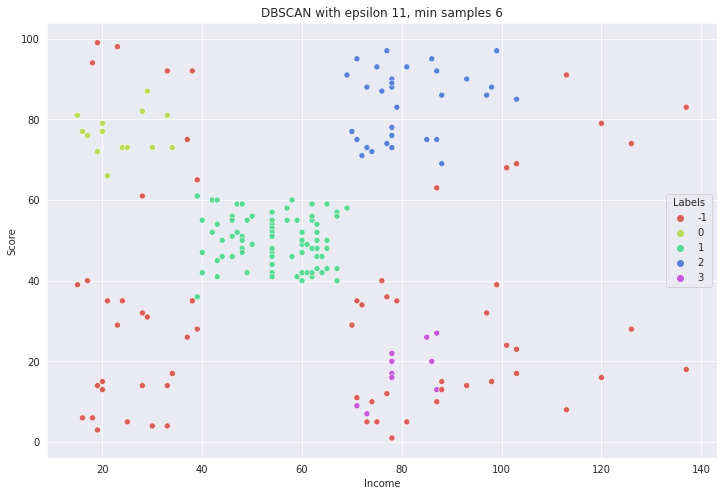

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


db = DBSCAN(eps=11, min_samples=6).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

In [ ]:
#Computing "the Silhouette Score"
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X, db.labels_, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.18372017413538166


We tried DBSCAN with epsillon 11, min sample 6. As we can see DBSCAN doesn't perform very well beacuse the density in our data is not strong. Label-1 means outliers so it will appear most as outliers.

We may have better performance if we have a bigger data.

Mean Shift Algorithm

Mean shift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post processing stage to eliminate near duplicates to form teh final set of centorids.

The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function, which is called if the bandwidth is not set.

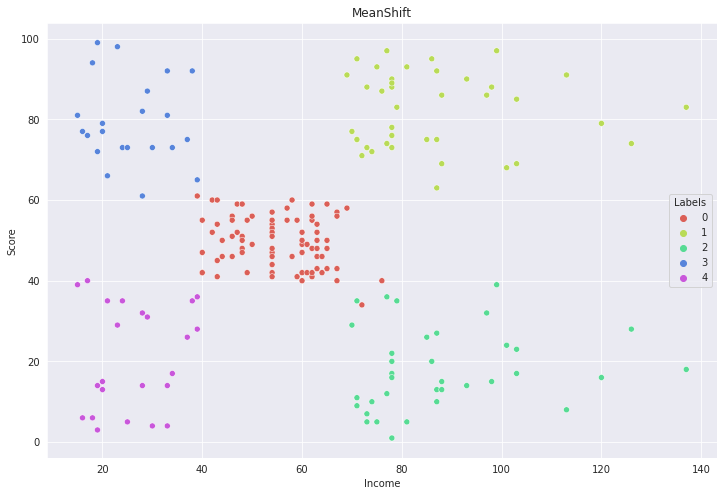

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift')
plt.show()

In [ ]:
#Computing "the Silhouette Score"
print("The silhouette score of the Mean Shift solution: {}"
      .format(metrics.silhouette_score(X, ms.labels_, metric='euclidean')))

The silhouette score of the Mean Shift solution: 0.4453701458195977


The Silhouette score 
K-mean

For n_clusters = 6 The average silhouette_score is : 0.45282478217020383

Agglomerative Clustering

The silhouette score of the agglomerative solution: 0.4196472258685429

DBSCAN

The silhouette score of the DBSCAN solution: 0.18372017413538166

Mean Shift

The silhouette score of the Mean Shift solution: 0.4453701458195977


Accroding to silhouette score, the best clustering method is k_mean 6 clustering.